# 1. import and install dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


In [2]:
try:
    import mediapipe
    print("MediaPipe is still installed.")
except ImportError:
    print("MediaPipe is not installed.")


MediaPipe is still installed.


# 2. keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
        
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [8]:
from PIL import ImageFont, ImageDraw, Image

In [9]:

cap = cv2.VideoCapture(0)


# Set the font and scale for the text
font_scale = 1
font_color = (0, 255, 0)
thickness = 4

# Set the font path
font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
font = ImageFont.truetype(font_path, 32)


#set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        #make detaction
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # draw landmarks
        draw_styled_landmarks(image,results)
             
      # Draw Amharic text on the frame
    
        img_pil = Image.fromarray(image)
        draw = ImageDraw.Draw(img_pil)
        draw.text((10, 20), 'ሰላም እንዲት ናችሁ?',font=font, fill=font_color)
        image = np.array(img_pil)

        
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
       
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
cap.release()
cv2.destroyAllWindows()

In [10]:
len(results.left_hand_landmarks.landmark)

21

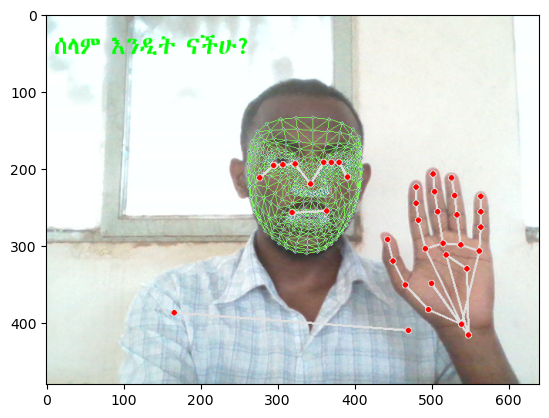

In [11]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

# 3. Extract key point values

In [12]:
len(results.pose_landmarks.landmark)

33

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
len(pose)

33

In [15]:
pose[0]

array([ 0.53733808,  0.45906511, -1.07255375,  0.99998754])

In [16]:
len(results.face_landmarks.landmark)*3

1404

In [17]:
face = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x,res.y,res.z])
    face.append(test)

In [18]:
len(face)

468

In [48]:
results.pose_landmarks.landmark

[x: 0.5447031
y: 0.4852985
z: -1.0929015
visibility: 0.99994606
, x: 0.56711686
y: 0.4255045
z: -1.0048189
visibility: 0.9998628
, x: 0.5814818
y: 0.42693472
z: -1.0048201
visibility: 0.99990964
, x: 0.5951109
y: 0.4289135
z: -1.0040119
visibility: 0.99984825
, x: 0.5125218
y: 0.4250621
z: -1.0298364
visibility: 0.9998467
, x: 0.49042416
y: 0.42628396
z: -1.0291696
visibility: 0.9998744
, x: 0.4720068
y: 0.42835337
z: -1.0296504
visibility: 0.9997921
, x: 0.6087636
y: 0.46234292
z: -0.5414341
visibility: 0.9998441
, x: 0.43539697
y: 0.4611187
z: -0.6399926
visibility: 0.99991816
, x: 0.57103455
y: 0.5601358
z: -0.92742074
visibility: 0.99989486
, x: 0.5063992
y: 0.5575037
z: -0.9606187
visibility: 0.99993485
, x: 0.7182224
y: 0.86938673
z: -0.26945785
visibility: 0.99843866
, x: 0.2607301
y: 0.843715
z: -0.4305542
visibility: 0.9934228
, x: 0.9041522
y: 1.344174
z: -0.8775729
visibility: 0.5641197
, x: 0.17886731
y: 1.3881785
z: -0.4472943
visibility: 0.16179919
, x: 0.82198966
y: 0.91

In [49]:
results.face_landmarks.landmark

[x: 0.54635376
y: 0.53916854
z: -0.035371784
, x: 0.55224526
y: 0.48608044
z: -0.053448245
, x: 0.54777503
y: 0.5052373
z: -0.030685581
, x: 0.54174435
y: 0.4447165
z: -0.03787665
, x: 0.5530989
y: 0.47183612
z: -0.055702075
, x: 0.55238575
y: 0.45549187
z: -0.050306823
, x: 0.5490963
y: 0.41888526
z: -0.01909097
, x: 0.46656498
y: 0.41995955
z: 0.007838
, x: 0.54865324
y: 0.38797122
z: -0.009849441
, x: 0.5494679
y: 0.36916322
z: -0.01009207
, x: 0.54979193
y: 0.30617523
z: 0.007360617
, x: 0.54590684
y: 0.54670614
z: -0.034466255
, x: 0.5448817
y: 0.55332303
z: -0.031293508
, x: 0.5437364
y: 0.55683327
z: -0.027037486
, x: 0.54290336
y: 0.5626566
z: -0.026076866
, x: 0.542952
y: 0.56897783
z: -0.027996834
, x: 0.5426396
y: 0.57727337
z: -0.030185092
, x: 0.54187685
y: 0.5864837
z: -0.028789172
, x: 0.5396748
y: 0.6004402
z: -0.019523246
, x: 0.55071414
y: 0.4943863
z: -0.049022023
, x: 0.5396777
y: 0.49503613
z: -0.037237912
, x: 0.4264913
y: 0.36911672
z: 0.054710235
, x: 0.49710837

In [19]:
pose = np.array([[res.x, res.y, res.z, res.visibility]
                for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(21*3)

In [20]:
face = np.array([[res.x, res.y, res.z]
                for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [21]:
lh = np.array([[res.x, res.y, res.z]
                for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
                

In [53]:
lh

array([ 8.09256494e-01,  8.78020287e-01,  2.48682483e-07,  7.51165986e-01,
        8.31959248e-01, -1.51960589e-02,  7.13656664e-01,  7.63747811e-01,
       -1.76287945e-02,  6.92560136e-01,  7.05078483e-01, -2.04571318e-02,
        6.78533852e-01,  6.57245398e-01, -2.23920755e-02,  7.66198993e-01,
        6.77607596e-01,  1.23415999e-02,  7.54488826e-01,  6.09038949e-01,
        4.16996563e-03,  7.49451041e-01,  5.68434834e-01, -7.59251183e-03,
        7.48145223e-01,  5.30728579e-01, -1.72383208e-02,  8.03014874e-01,
        6.71472251e-01,  9.30635072e-03,  7.99395084e-01,  5.91459036e-01,
        5.57219516e-03,  7.97353566e-01,  5.41487336e-01, -4.02731635e-03,
        7.96744108e-01,  4.99642998e-01, -1.23141212e-02,  8.38247895e-01,
        6.81619465e-01,  1.43572025e-03,  8.40220094e-01,  6.08704269e-01,
       -5.88769419e-03,  8.40507865e-01,  5.60962677e-01, -1.33450544e-02,
        8.40552449e-01,  5.17864943e-01, -1.94994714e-02,  8.72276783e-01,
        7.05412924e-01, -

In [22]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
rh = np.array([[res.x, res.y, res.z]
                for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [24]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [26]:
 extract_keypoints(results)[:-10]

array([ 0.53733808,  0.45906511, -1.07255375, ...,  0.        ,
        0.        ,  0.        ])

In [27]:
468*3+33*4+21*3+21*3

1662

4. Setup Folders for Collection

In [28]:
DATA_PATH = os.path.join('MP_Data') # path for exported numpy array
# Data_PATH = "C:/Users/Elias/Desktop/Project-Feb to/ESLT-1/MP_DATA"
actions = np.array(['ሰላም', 'አመሰግናለሁ', 'እወዳችሆለሁ']) #action try to detact
no_sequences = 30 # Thirty videos of worth data
sequence_length = 30 # videos are going to be 30 frame in lenght

In [29]:
actions[1]

'አመሰግናለሁ'

In [30]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5. Collect Keypoints Values for Training and Testing

In [31]:
cap = cv2.VideoCapture(0)

#set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
   
   # Loop through actions
    for action in actions:
        # Loop through sequences in videos
        for sequence in range(no_sequences):
            # Loop through video length data sequence lengthqqq
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()
                
                #make detaction 
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # draw landmarks
                draw_styled_landmarks(image,results)
                
                #Apply collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        
                    # show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                #NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully  
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [33]:
cap.release()
cv2.destroyAllWindows()

6. Preprocess Data and Create Labels and Features

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.15.0'

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [37]:
label_map = {label:num for num, label in enumerate(actions)}

In [38]:
label_map

{'ሰላም': 0, 'አመሰግናለሁ': 1, 'እወዳችሆለሁ': 2}

In [39]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [40]:
np.array(labels).shape

(90,)

In [41]:
np.array(sequences).shape

(90, 30, 1662)

In [42]:
np.array(window).shape

(30, 1662)

In [43]:
x = np.array(sequences)

In [44]:
x.shape

(90, 30, 1662)

In [74]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [45]:
y = to_categorical(labels).astype(int)

In [19]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [47]:
x_test.shape

(5, 30, 1662)

In [48]:
x_train.shape

(85, 30, 1662)

In [49]:
y_test.shape

(5, 3)

In [50]:
y_train.shape

(85, 3)

7. Build and Train LSTM Neural Network

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [52]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [53]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [54]:
x.shape

(90, 30, 1662)

In [55]:
actions.shape[0]

3

In [56]:
res = [.1, 0.3, 0.5]

In [57]:
np.argmax(res)

2

In [58]:
actions[np.argmax(res)]

'እወዳችሆለሁ'

In [59]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000


3/3 [==============================] - 15s 102ms/step - loss: 6.9877 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 91ms/step - loss: 8.5452 - categorical_accuracy: 0.3294
Epoch 3/2000
3/3 [==============================] - 0s 87ms/step - loss: 5.3690 - categorical_accuracy: 0.2118
Epoch 4/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.8098 - categorical_accuracy: 0.2706
Epoch 5/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.4214 - categorical_accuracy: 0.2706
Epoch 6/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.2287 - categorical_accuracy: 0.2118
Epoch 7/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.6717 - categorical_accuracy: 0.3529
Epoch 8/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.2274 - categorical_accuracy: 0.3765
Epoch 9/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.3512 - categorical_accuracy: 0.3

3/3 [==============================] - 0s 92ms/step - loss: 0.5462 - categorical_accuracy: 0.7059
Epoch 142/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0896 - categorical_accuracy: 0.6588
Epoch 143/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.7830 - categorical_accuracy: 0.6588
Epoch 144/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.7477 - categorical_accuracy: 0.6353
Epoch 145/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.8202 - categorical_accuracy: 0.7529
Epoch 146/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.2068 - categorical_accuracy: 0.7059
Epoch 147/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.8308 - categorical_accuracy: 0.6706
Epoch 148/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.1208 - categorical_accuracy: 0.5765
Epoch 149/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.4806 - categorical_accuracy: 0.729

3/3 [==============================] - 0s 96ms/step - loss: 0.0964 - categorical_accuracy: 0.9647
Epoch 286/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.1045 - categorical_accuracy: 0.9529
Epoch 287/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0939 - categorical_accuracy: 0.9647
Epoch 288/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1059 - categorical_accuracy: 0.9647
Epoch 289/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0983 - categorical_accuracy: 0.9882
Epoch 290/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0993 - categorical_accuracy: 0.9647
Epoch 291/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0974 - categorical_accuracy: 0.9882
Epoch 292/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1151 - categorical_accuracy: 0.9529
Epoch 293/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.1176 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 95ms/step - loss: 0.1434 - categorical_accuracy: 0.9529
Epoch 430/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1976 - categorical_accuracy: 0.9059
Epoch 431/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4783 - categorical_accuracy: 0.8588
Epoch 432/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.4665 - categorical_accuracy: 0.8471
Epoch 433/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.4995 - categorical_accuracy: 0.6353
Epoch 434/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4126 - categorical_accuracy: 0.8706
Epoch 435/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0608 - categorical_accuracy: 0.7176
Epoch 436/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.3199 - categorical_accuracy: 0.6706
Epoch 437/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.8251 - categorical_accuracy: 0.52

3/3 [==============================] - 0s 100ms/step - loss: 0.1243 - categorical_accuracy: 0.9647
Epoch 574/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.2143 - categorical_accuracy: 0.9529
Epoch 575/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.2807 - categorical_accuracy: 0.8941
Epoch 576/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.5023 - categorical_accuracy: 0.9176
Epoch 577/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.8759 - categorical_accuracy: 0.8941
Epoch 578/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0427 - categorical_accuracy: 0.8235
Epoch 579/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0797 - categorical_accuracy: 0.9059
Epoch 580/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.4304 - categorical_accuracy: 0.9412
Epoch 581/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.9726 - categorical_accuracy: 0.8

3/3 [==============================] - 0s 86ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 718/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 719/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 721/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 722/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 723/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 724/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 725/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0021 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 80ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 862/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 863/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 864/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 865/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 866/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 867/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 869/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0014 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 92ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1006/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1007/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1008/2000
3/3 [==============================] - 0s 99ms/step - loss: 9.8057e-04 - categorical_accuracy: 1.0000
Epoch 1009/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1010/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1011/2000
3/3 [==============================] - 0s 97ms/step - loss: 9.7672e-04 - categorical_accuracy: 1.0000
Epoch 1012/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1013/2000
3/3 [==============================] - 0s 94ms/step - loss: 9.9451e-04 - categor

3/3 [==============================] - 0s 100ms/step - loss: 7.5543e-04 - categorical_accuracy: 1.0000
Epoch 1144/2000
3/3 [==============================] - 0s 74ms/step - loss: 8.1721e-04 - categorical_accuracy: 1.0000
Epoch 1145/2000
3/3 [==============================] - 0s 90ms/step - loss: 7.5287e-04 - categorical_accuracy: 1.0000
Epoch 1146/2000
3/3 [==============================] - 0s 97ms/step - loss: 7.7035e-04 - categorical_accuracy: 1.0000
Epoch 1147/2000
3/3 [==============================] - 0s 75ms/step - loss: 8.0332e-04 - categorical_accuracy: 1.0000
Epoch 1148/2000
3/3 [==============================] - 0s 96ms/step - loss: 7.8967e-04 - categorical_accuracy: 1.0000
Epoch 1149/2000
3/3 [==============================] - 0s 98ms/step - loss: 7.8184e-04 - categorical_accuracy: 1.0000
Epoch 1150/2000
3/3 [==============================] - 0s 93ms/step - loss: 7.6214e-04 - categorical_accuracy: 1.0000
Epoch 1151/2000
3/3 [==============================] - 0s 99ms/step - l

3/3 [==============================] - 0s 97ms/step - loss: 6.1448e-04 - categorical_accuracy: 1.0000
Epoch 1282/2000
3/3 [==============================] - 0s 100ms/step - loss: 6.1313e-04 - categorical_accuracy: 1.0000
Epoch 1283/2000
3/3 [==============================] - 0s 90ms/step - loss: 6.1138e-04 - categorical_accuracy: 1.0000
Epoch 1284/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.1030e-04 - categorical_accuracy: 1.0000
Epoch 1285/2000
3/3 [==============================] - 0s 93ms/step - loss: 5.9946e-04 - categorical_accuracy: 1.0000
Epoch 1286/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.9951e-04 - categorical_accuracy: 1.0000
Epoch 1287/2000
3/3 [==============================] - 0s 92ms/step - loss: 6.0483e-04 - categorical_accuracy: 1.0000
Epoch 1288/2000
3/3 [==============================] - 0s 88ms/step - loss: 6.0833e-04 - categorical_accuracy: 1.0000
Epoch 1289/2000
3/3 [==============================] - 0s 65ms/step - l

3/3 [==============================] - 0s 95ms/step - loss: 4.8516e-04 - categorical_accuracy: 1.0000
Epoch 1420/2000
3/3 [==============================] - 0s 94ms/step - loss: 4.8104e-04 - categorical_accuracy: 1.0000
Epoch 1421/2000
3/3 [==============================] - 0s 98ms/step - loss: 4.8231e-04 - categorical_accuracy: 1.0000
Epoch 1422/2000
3/3 [==============================] - 0s 93ms/step - loss: 4.8423e-04 - categorical_accuracy: 1.0000
Epoch 1423/2000
3/3 [==============================] - 0s 96ms/step - loss: 4.8193e-04 - categorical_accuracy: 1.0000
Epoch 1424/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.8064e-04 - categorical_accuracy: 1.0000
Epoch 1425/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.7853e-04 - categorical_accuracy: 1.0000
Epoch 1426/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.8193e-04 - categorical_accuracy: 1.0000
Epoch 1427/2000
3/3 [==============================] - 0s 91ms/step - lo

3/3 [==============================] - 0s 95ms/step - loss: 3.8248e-04 - categorical_accuracy: 1.0000
Epoch 1558/2000
3/3 [==============================] - 0s 71ms/step - loss: 3.8507e-04 - categorical_accuracy: 1.0000
Epoch 1559/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.8926e-04 - categorical_accuracy: 1.0000
Epoch 1560/2000
3/3 [==============================] - 0s 101ms/step - loss: 3.8596e-04 - categorical_accuracy: 1.0000
Epoch 1561/2000
3/3 [==============================] - 0s 92ms/step - loss: 3.8641e-04 - categorical_accuracy: 1.0000
Epoch 1562/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.8655e-04 - categorical_accuracy: 1.0000
Epoch 1563/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.8333e-04 - categorical_accuracy: 1.0000
Epoch 1564/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.8032e-04 - categorical_accuracy: 1.0000
Epoch 1565/2000
3/3 [==============================] - 0s 67ms/step - l

3/3 [==============================] - 0s 86ms/step - loss: 3.1210e-04 - categorical_accuracy: 1.0000
Epoch 1696/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.0870e-04 - categorical_accuracy: 1.0000
Epoch 1697/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.0862e-04 - categorical_accuracy: 1.0000
Epoch 1698/2000
3/3 [==============================] - 0s 69ms/step - loss: 3.1381e-04 - categorical_accuracy: 1.0000
Epoch 1699/2000
3/3 [==============================] - 0s 79ms/step - loss: 3.0835e-04 - categorical_accuracy: 1.0000
Epoch 1700/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.0532e-04 - categorical_accuracy: 1.0000
Epoch 1701/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.1065e-04 - categorical_accuracy: 1.0000
Epoch 1702/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.0741e-04 - categorical_accuracy: 1.0000
Epoch 1703/2000
3/3 [==============================] - 0s 99ms/step - l

3/3 [==============================] - 0s 96ms/step - loss: 2.4692e-04 - categorical_accuracy: 1.0000
Epoch 1834/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.4693e-04 - categorical_accuracy: 1.0000
Epoch 1835/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.4727e-04 - categorical_accuracy: 1.0000
Epoch 1836/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.5246e-04 - categorical_accuracy: 1.0000
Epoch 1837/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.4832e-04 - categorical_accuracy: 1.0000
Epoch 1838/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.4516e-04 - categorical_accuracy: 1.0000
Epoch 1839/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.4677e-04 - categorical_accuracy: 1.0000
Epoch 1840/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.4831e-04 - categorical_accuracy: 1.0000
Epoch 1841/2000
3/3 [==============================] - 0s 94ms/step - 

3/3 [==============================] - 0s 75ms/step - loss: 1.9966e-04 - categorical_accuracy: 1.0000
Epoch 1972/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.9942e-04 - categorical_accuracy: 1.0000
Epoch 1973/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.9897e-04 - categorical_accuracy: 1.0000
Epoch 1974/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.9589e-04 - categorical_accuracy: 1.0000
Epoch 1975/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.9809e-04 - categorical_accuracy: 1.0000
Epoch 1976/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.9710e-04 - categorical_accuracy: 1.0000
Epoch 1977/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.9783e-04 - categorical_accuracy: 1.0000
Epoch 1978/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.9634e-04 - categorical_accuracy: 1.0000
Epoch 1979/2000
3/3 [==============================] - 0s 100ms/ste

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

8. Make Predictions

In [61]:
model.predict(x_test)

1/1 [==============================] - 2s 2s/step


array([[0.33458975, 0.33434165, 0.33106858],
       [0.329257  , 0.3417487 , 0.3289942 ],
       [0.33496818, 0.3345904 , 0.3304414 ],
       [0.33506396, 0.3344227 , 0.33051327],
       [0.33397198, 0.3375315 , 0.3284965 ]], dtype=float32)

In [56]:
res = model.predict(x_test)

1/1 [==============================] - 0s 119ms/step


In [71]:
res[0]

array([0.33177108, 0.34770706, 0.32052183], dtype=float32)

In [62]:
actions[np.argmax(res[2])]

'ሰላም'

In [63]:
actions[np.argmax(y_test[4])]

'ሰላም'

9. Save Weights

In [64]:
# model.save('action.h5')

In [70]:
filesize = os.path.getsize('tmodel.tflite')

In [71]:
if filesize > 0:
    print("The model file contains data.")
else:
    print("The model file is empty or does not exist.")

The model file contains data.


In [78]:
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical

In [79]:
# # Reshape input data if needed
# input_data = x_test.reshape((5,30,1662)).astype(np.float32)

# # Set input tensor to the interpreter
# interpreter.set_tensor(input_details[0]['index'], input_data)


In [82]:
# predicted_labels = []
# for i in range(len(x_test)):
#   input_data = x_test[i]  # Access each input sample
#   interpreter.set_tensor(input_details[0]['index'], input_data)
#   interpreter.invoke()
#   output_data = interpreter.get_tensor(output_details[0]['index'])
#   predicted_label = np.argmax(output_data)  # Assuming single-label classification
#   predicted_labels.append(predicted_label)


In [83]:
# # Count the number of parameters
# total_parameters = 0
# for tensor in tensors_details:
#     tensor_type = tensor['dtype']
#     tensor_shape = tensor['shape']
#     num_elements = 1
#     for dim in tensor_shape:
#         num_elements *= dim
#     total_parameters += num_elements

In [84]:
# print("Total number of parameters in the model:", total_parameters)

Total number of parameters in the model: 157557


# 10. Evaluation using Confusion Matrix and Accuracy

In [85]:
# from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [86]:
# # Assuming x_test is test data

# # Prepare input data (assuming single input tensor)
# input_data = x_test.astype(np.float32)

In [87]:
# # Assuming your input_data has a shape like (5, 30, 1662)
# input_data = np.expand_dims(input_data, axis=0)

In [88]:
# np.array(input_data).shape

(1, 5, 30, 1662)

In [103]:
# np.array(input_details)

In [91]:
# interpreter.set_tensor(input_details[0]['index'], input_data)

In [92]:
# # Run inference
# interpreter.invoke()

# # Get the output
# output_data = interpreter.get_tensor(output_details[0]['index'])

# # Convert output to classes
# yhat = np.argmax(output_data, axis=1).tolist()

# # Assuming y_test is the true labels
# ytrue = np.argmax(y_test, axis=1).tolist()

In [94]:
# accuracy_score(ytrue, yhat)

In [95]:
# from scipy import stats

# 11. Test in Real Time (using .tflite model)

In [112]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [113]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [114]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
        
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [115]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [120]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import cv2

In [121]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="tmodel.tflite")
interpreter.allocate_tensors()

In [122]:
# Get details about the model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [128]:
colors = [(245,117,16), (117,200,160), (16,117,245)]

# Function to render text with Amharic characters on OpenCV image
def render_text_with_amharic(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        # Display Amharic text using render_text_with_amharic function
        output_frame = render_text_with_amharic(output_frame, actions[num], (0, 50+num*40))
    return output_frame

In [129]:
# Set up mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Set the font and scale for the text
font_scale = 1
font_color = (0, 255, 0)
thickness = 4

# Set the font path
font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
font = ImageFont.truetype(font_path, 32)

# Function to render text on OpenCV image
def render_text(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()

    # Make detections
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmarks
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Prediction logic
    keypoints = extract_keypoints(results)  # Assuming this function is defined elsewhere
    sequence.append(keypoints)
    sequence = sequence[-30:]

    if len(sequence) == 30:
        # Perform inference with TensorFlow Lite model
        input_data = np.expand_dims(sequence, axis=0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        res = interpreter.get_tensor(output_details[0]['index'])[0]

        predictions.append(np.argmax(res))

        # Sentence formation logic
        if np.unique(predictions[-10:])[0] == np.argmax(res) and res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Visualize probabilities
        image = prob_viz(res, actions, image, colors)  # Assuming this function is defined elsewhere

    # Render sentence on the frame
    image = cv2.rectangle(image, (0, 0), (640, 40), (240, 240, 240), -1)
    image = render_text(image, ' '.join(sentence), (5, 5))

    # Show to screen
    cv2.imshow('OpenCV Feed', image)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


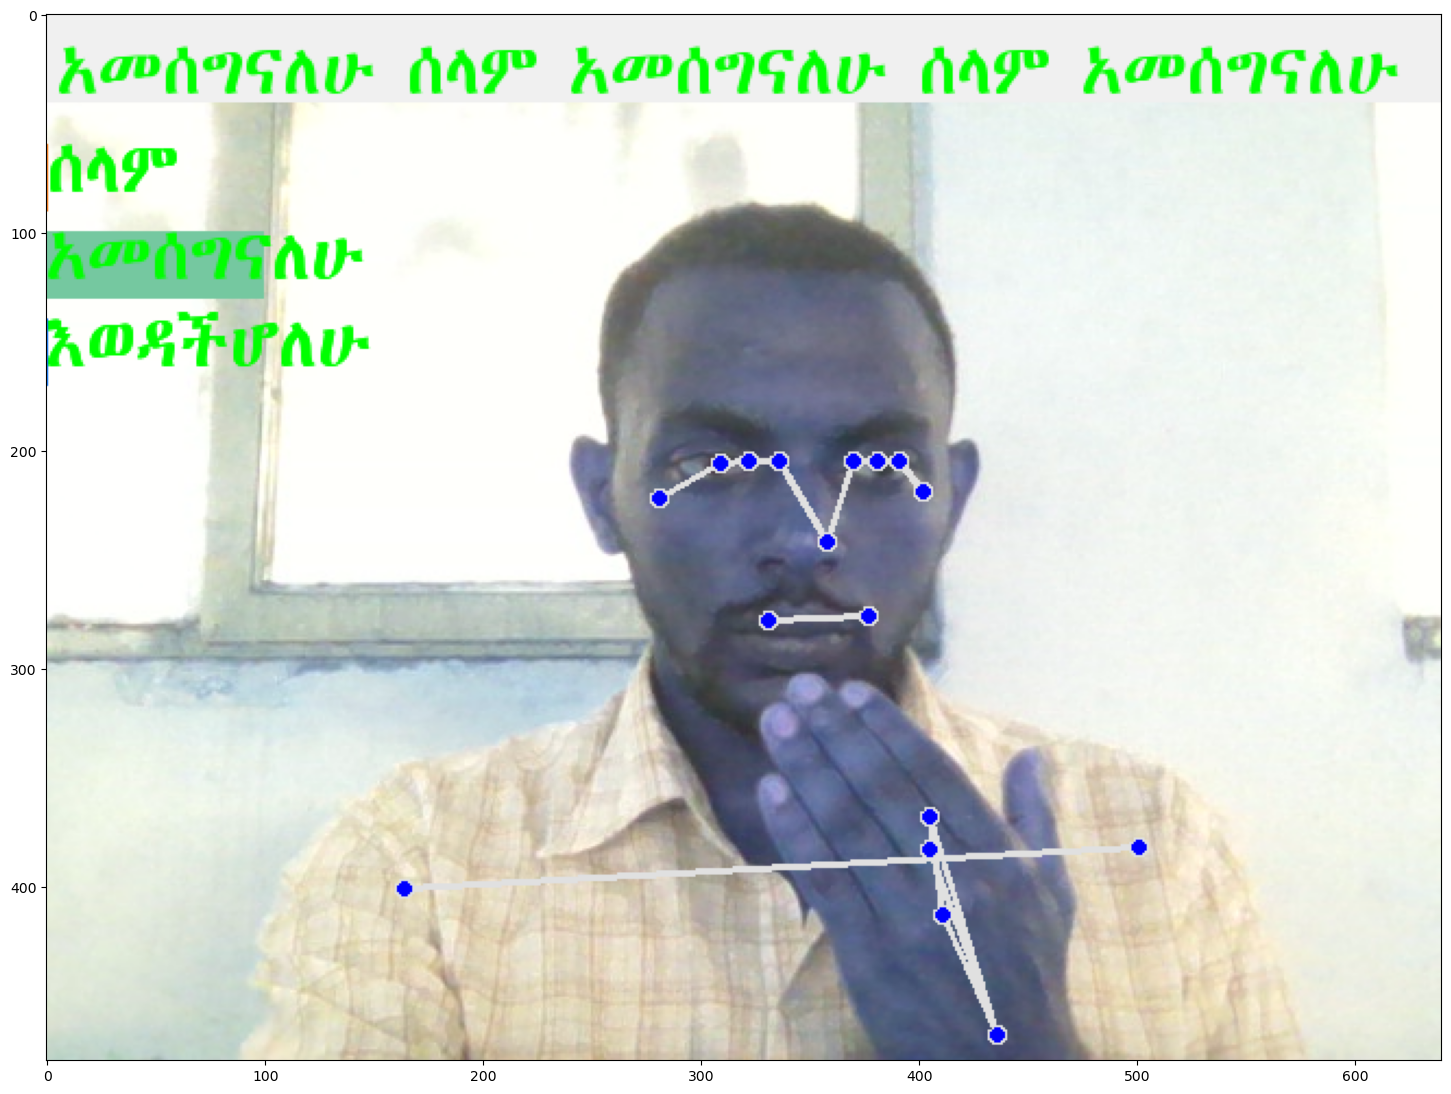

In [130]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [126]:
cap.release()
cv2.destroyAllWindows()


12. Test in real time (usng .h5 model)

In [67]:
# from PIL import ImageFont, ImageDraw, Image

In [ ]:
# colors = [(245,117,16), (117,200,160), (16,117,245)]

# # Function to render text with Amharic characters on OpenCV image
# def render_text_with_amharic(image, text, position):
#     img_pil = Image.fromarray(image)
#     draw = ImageDraw.Draw(img_pil)
#     draw.text(position, text, font=font, fill=font_color)
#     return np.array(img_pil)

# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         # Display Amharic text using render_text_with_amharic function
#         output_frame = render_text_with_amharic(output_frame, actions[num], (0, 50+num*40))
#     return output_frame

In [90]:


# # Set the font and scale for the text
# font_scale = 1
# font_color = (255, 0, 0)
# thickness = 4

# # Set the font path
# font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
# font = ImageFont.truetype(font_path, 32)

# # Function to render text on OpenCV image
# def render_text(image, text, position):
#     img_pil = Image.fromarray(image)
#     draw = ImageDraw.Draw(img_pil)
#     draw.text(position, text, font=font, fill=font_color)
#     return np.array(img_pil)

# # New detection variables
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.5

# # Set up mediapipe
# mp_holistic = mp.solutions.holistic
# holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# cap = cv2.VideoCapture(0)

# while cap.isOpened():
#     # Read feed
#     ret, frame = cap.read()

#     # Make detections
#     image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     results = holistic.process(image)

#     # Draw landmarks
#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

#     # Prediction logic
#     keypoints = extract_keypoints(results)  # Assuming this function is defined elsewhere
#     sequence.append(keypoints)
#     sequence = sequence[-30:]

#     if len(sequence) == 30:
#         res = model.predict(np.expand_dims(sequence, axis=0))[0]
#         predictions.append(np.argmax(res))

#         # Sentence formation logic
#         if np.unique(predictions[-10:])[0] == np.argmax(res) and res[np.argmax(res)] > threshold:
#             if len(sentence) > 0:
#                 if actions[np.argmax(res)] != sentence[-1]:
#                     sentence.append(actions[np.argmax(res)])
#             else:
#                 sentence.append(actions[np.argmax(res)])

#         if len(sentence) > 5:
#             sentence = sentence[-5:]

#         # Visualize probabilities
#         image = prob_viz(res, actions, image, colors)  # Assuming this function is defined elsewhere

#     # Render sentence on the frame
#     image = cv2.rectangle(image, (0, 0), (640, 40), (255, 255, 255), -1)
#     image = render_text(image, ' '.join(sentence), (3, 30))

#     # Show to screen
#     cv2.imshow('OpenCV Feed', image)

#     # Break gracefully
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


1/1 [==============================] - 0s 32ms/step


In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [82]:
cap.release()
cv2.destroyAllWindows()

